In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [3]:
# Seaborn has inbuilt datasetsn.m/

tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4





Dist Plot


it is normal histogram plot with kde analysis

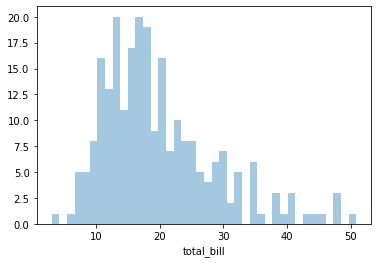

In [5]:
sns.distplot(tips['total_bill'],kde=False,bins=40)      

# kde: Kernel density estimation
# Bins size depends on data set

Joint Plot

It is combination of 2 dist plot and compare the tow varriable 

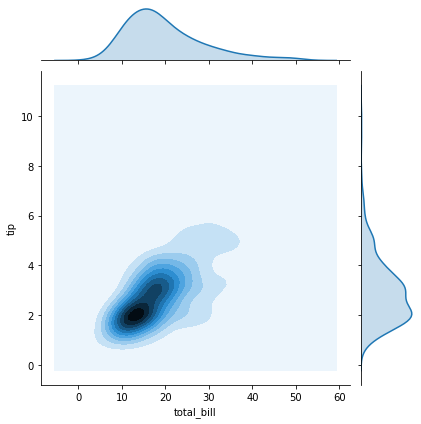

In [6]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

#kind must be either 'scatter', 'reg', 'resid', 'kde', or 'hex'

Pair Plot

pair plot is used to show the pair wise relation acroos entire data set, atlest for the numerical input

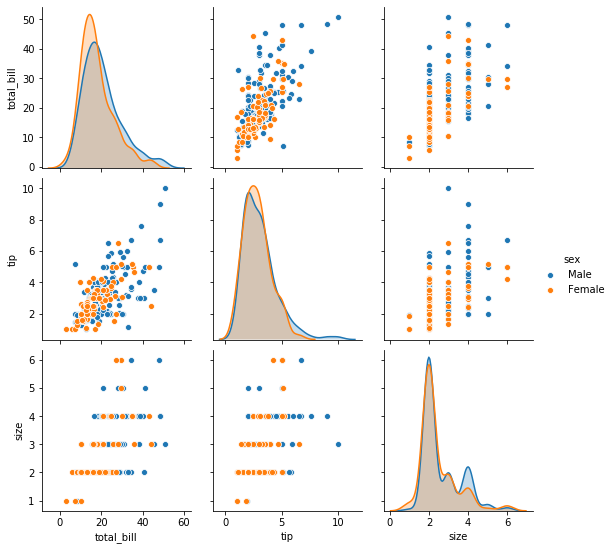

In [7]:
sns.pairplot(tips,hue='sex')

#hue is used to categorically divide your data, eg: we can categorically divide tha above data frame on 'sex' of customer

Rug Plot

rug plot is smilar to dist plot. but in rug plot each variable is marked in gap in form of dash.
and through this dashes the histofgram is constructed to build a dist plot
Rug plot is also use for KDE

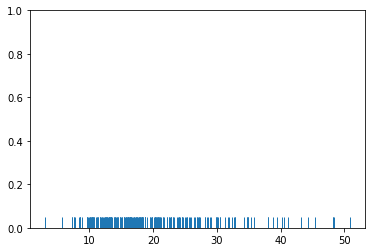

In [8]:
sns.rugplot(tips['total_bill'])

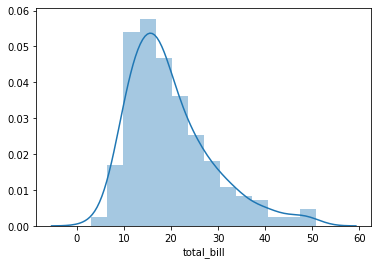

In [9]:
sns.distplot(tips['total_bill'])

# everi histogram deotes how many rug plots are in there
# evey rug plot is converted into normal distribution and KDE is the sum of all these normal distribution

# KDE distribution

(0, 1)

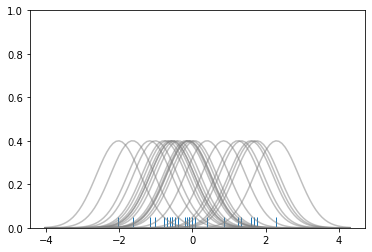

In [10]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

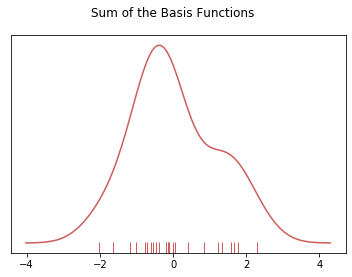

In [11]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

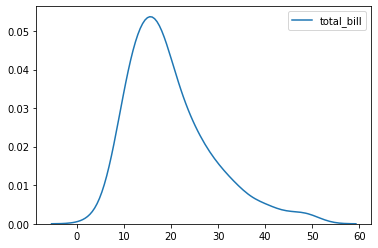

In [12]:
sns.kdeplot(tips['total_bill'])

# Categorical Plot

In [13]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Bar Plot

it aggregate the categorical data, group by mean or any other estimator 

In [14]:
import numpy as np

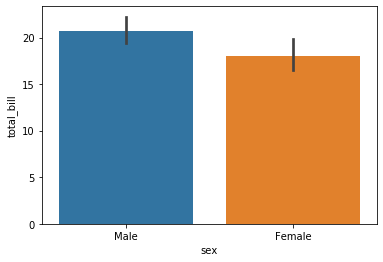

In [15]:
sns.barplot(x='sex',y='total_bill',data=tips,)

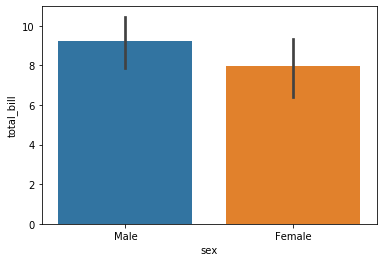

In [16]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

# we can any func in estimator for analysis

Count Plot

It is same as the bar plot but estimator will only calculate the no. of occurance
It is same as the pandas count method

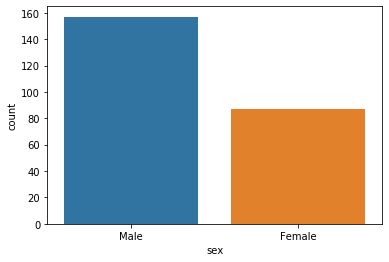

In [17]:
sns.countplot(x='sex',data=tips)

#estimates by default calculate no. of occurances
#y axis is by default no. of count

Box Plot

The box plot shows the quartiles of the data set while the whiskers extend to show the rest of the
distribution except for these points that are outside of these whiskers.

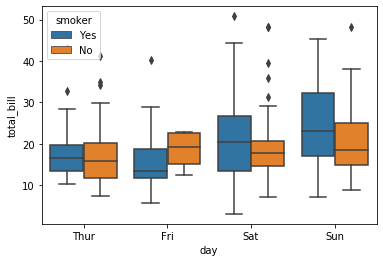

In [18]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

Violin Plot

it's essentially showing the kernel density estimation of the underlying distribution

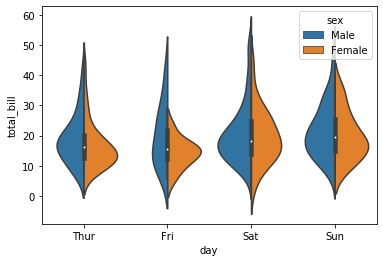

In [19]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

Strip Plot

it is sort of scatter plot where one varriable is categorical.

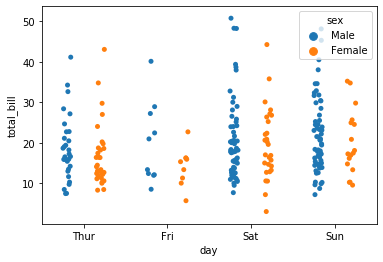

In [20]:
sns.stripplot(x='day',y='total_bill',data=tips, jitter=True, hue='sex', dodge=True)

# Jitter is use to add noise in the plot and help in view no of points marked on the plot
# SPlit and dodge parameter are same

Swarn Plot

it is combination of strip plot, scatter plot and voilen plot
All the data point are scater in way that all of them are visible

Swarn plot can be combine with violin plot to form the in detailed categorical data analysis
Not commanly used as it is not easy to undertand

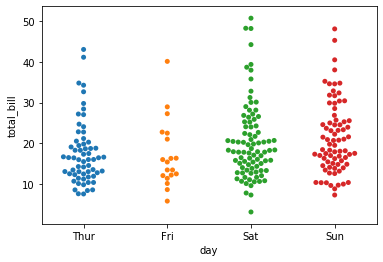

In [21]:
sns.swarmplot(x='day',y='total_bill',data=tips,)

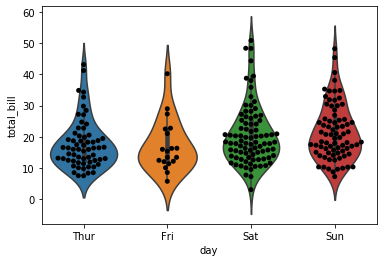

In [22]:
# combination of swarn and violin plot is used foe kde analysis

sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

Factor Plot

It is a general method to call any plot.

Factor Plot is renamed as catplot

/Users/deepak/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


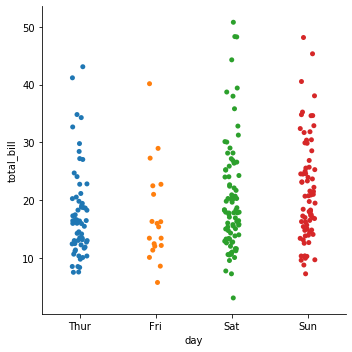

In [23]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='strip')

# Matrix Plot

THe best way to shot the matrix plot is through Heat map. And for heat mat to work primarly data should be in Matrix form

In [4]:
flights = sns.load_dataset("flights")

In [5]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [25]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [26]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [27]:
# Converting a tips dataframe into Matrix or finding correalation between variable

tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


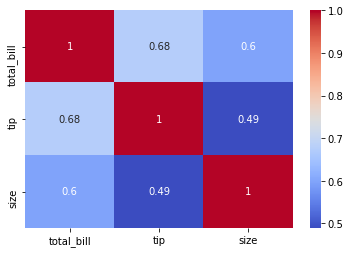

In [28]:
# Heat Map

sns.heatmap(tips.corr(),annot=True,cmap='coolwarm')

In [29]:
flights.corr()  # Not very usefull

,year,passengers
year,1.000000,0.921824
passengers,0.921824,1.000000


In [30]:
# Pivot Table to built a matrix

flt_pvt = flights.pivot_table(index='month',columns='year',values='passengers')

In [31]:
flt_pvt

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


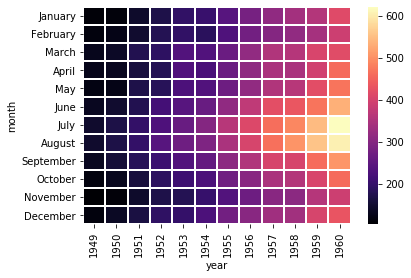

In [32]:
# Heat map of the Pivot table

sns.heatmap(flt_pvt,cmap='magma',linecolor='white',linewidths=1)

In [33]:
# Pivot Table of Tips Dataframe

tip_pvt = tips.pivot_table(index='day',columns=['sex','smoker'],values=['total_bill','tip'])

In [34]:
tip_pvt # Not very effective as data is very scatter for pivot to run

tip                               total_bill             \
sex         Male              Female                 Male              
smoker       Yes        No       Yes        No        Yes         No   
day                                                                    
Thur    3.058000  2.941500  2.990000  2.459600  19.171000  18.486500   
Fri     2.741250  2.500000  2.682857  3.125000  20.452500  17.475000   
Sat     2.879259  3.256563  2.868667  2.724615  21.837778  19.929063   
Sun     3.521333  3.115349  3.500000  3.329286  26.141333  20.403256   

                              
sex        Female             
smoker        Yes         No  
day                           
Thur    19.218571  16.014400  
Fri     12.654286  19.365000  
Sat     20.266667  19.003846  
Sun     16.540000  20.824286

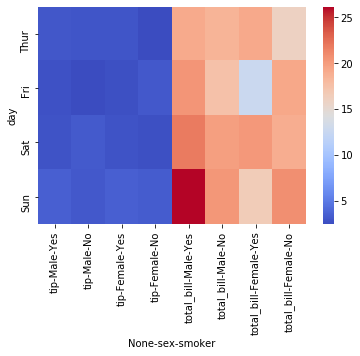

In [35]:
sns.heatmap(tip_pvt,cmap='coolwarm')

Cluster Map

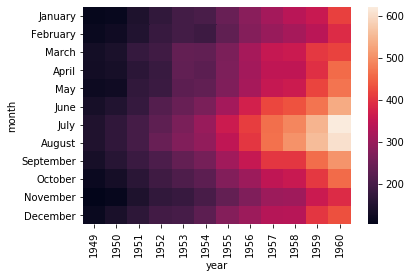

In [36]:
sns.heatmap(flt_pvt)

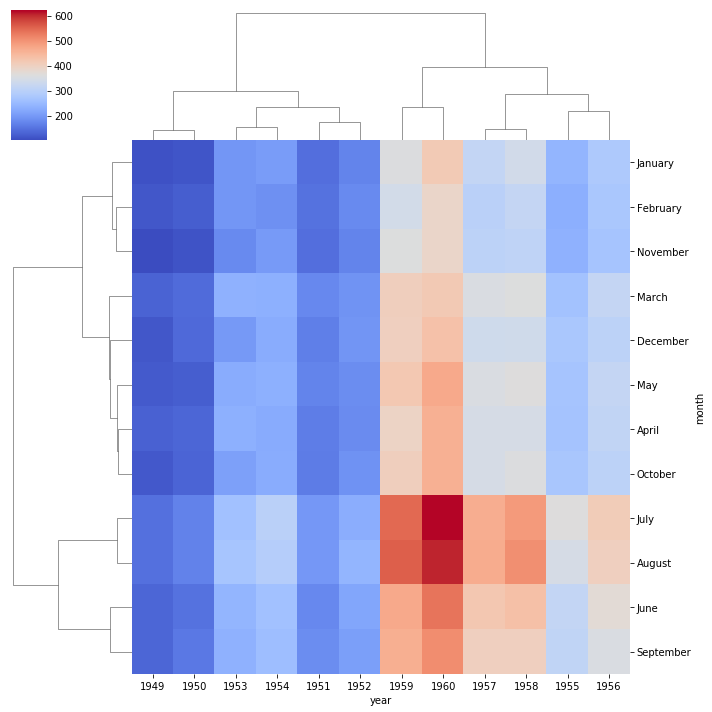

In [37]:
# Cluster Heat map

sns.clustermap(flt_pvt,cmap='coolwarm')

# Grids

In [38]:
iris = sns.load_dataset('iris')

In [39]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

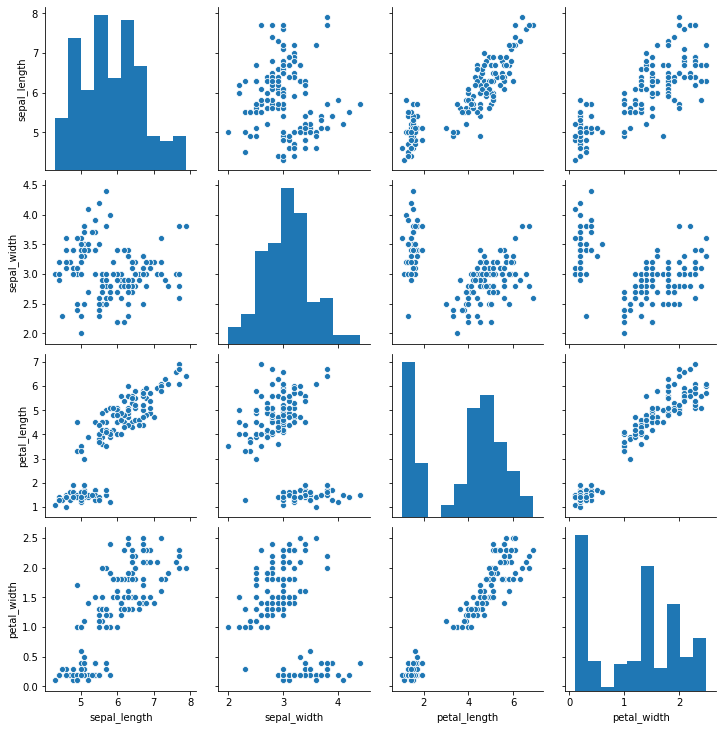

In [41]:
# Pair plot

sns.pairplot(iris)

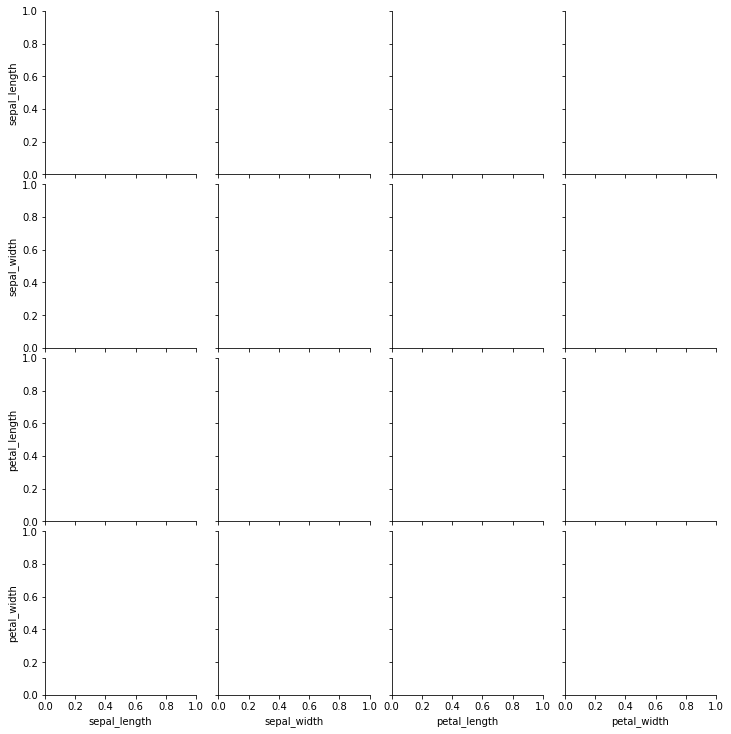

In [42]:
# Pair grid

sns.PairGrid(iris)    # Pair grid will generate a empty plot on which we can map with differet other plots

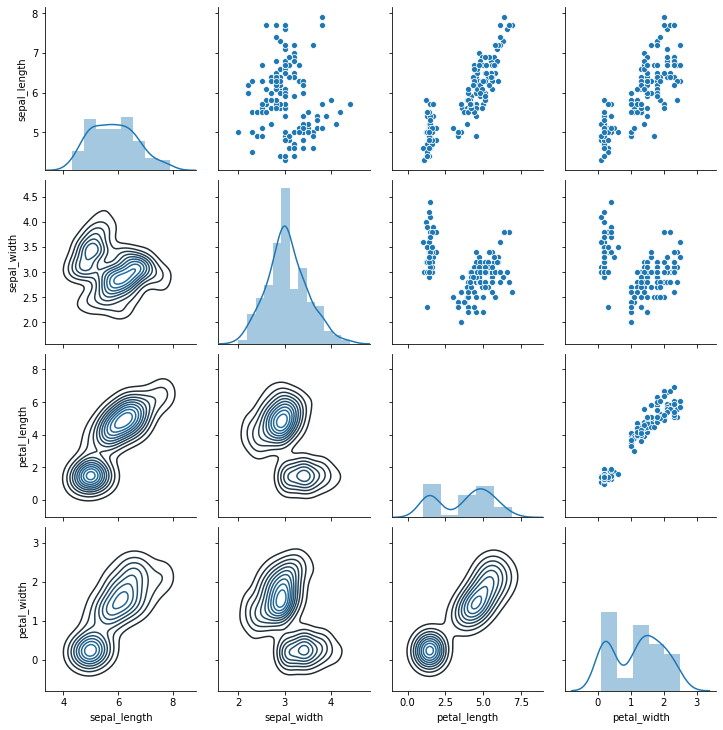

In [43]:
# Mappint paid grid with other plots

ig = sns.PairGrid(iris)
ig.map_diag(sns.distplot)
ig.map_upper(sns.scatterplot)
ig.map_lower(sns.kdeplot)

Facet Grid Plot

In [44]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


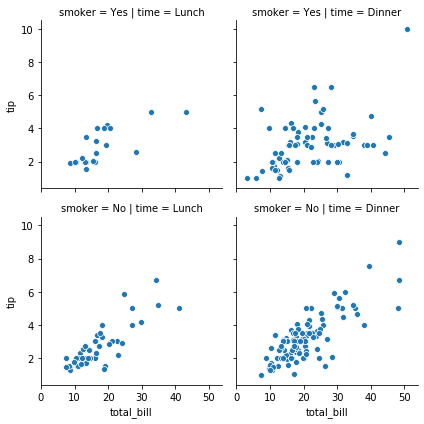

In [45]:
tg = sns.FacetGrid(data=tips,col='time',row='smoker')
tg.map(sns.scatterplot,'total_bill','tip')

# Regression Plots

LM Plot

    Linear modeling Plot

In [46]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


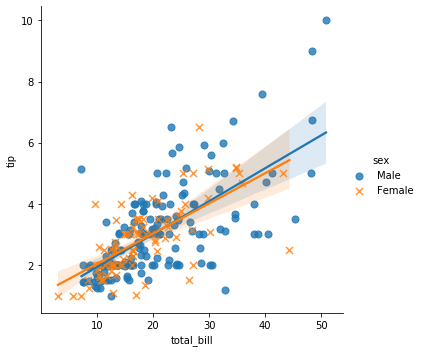

In [49]:
sns.lmplot(x='total_bill',y='tip', data=tips,hue='sex',markers=['o','x'], scatter_kws={'s':50})

Combining Facet Plot with reg or lm plot

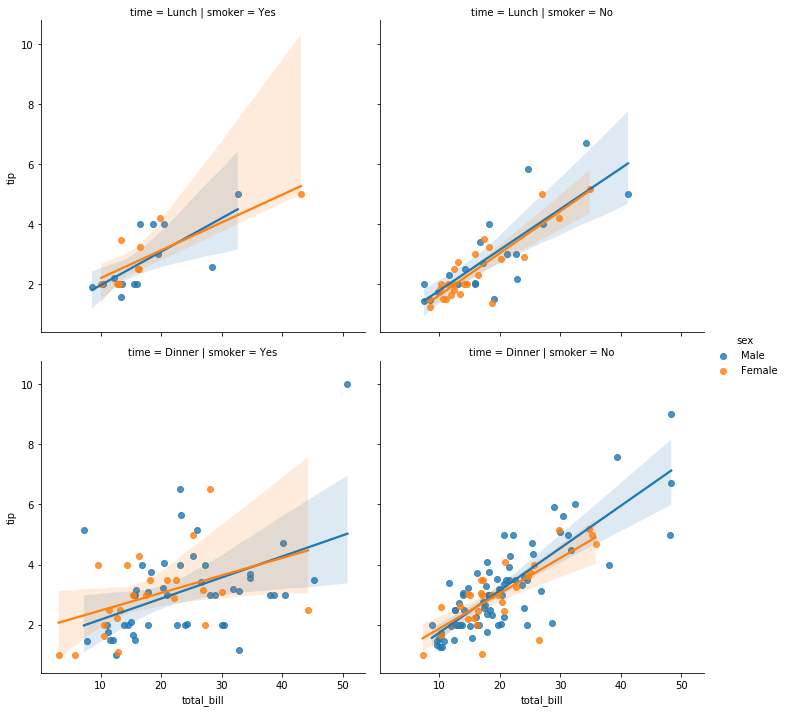

In [55]:
sns.lmplot(x='total_bill',y='tip', data=tips, col='smoker', row='time',hue='sex')

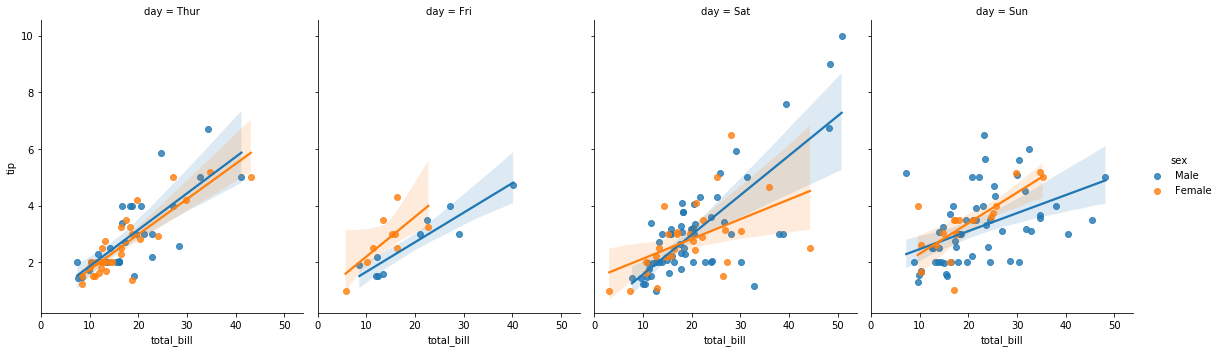

In [62]:
sns.lmplot(x='total_bill',y='tip', data=tips, col='day', hue='sex',aspect=0.8,height=5)

# Size parameter is beed replaced with height in python 3.7

# Styles and Color

In [63]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


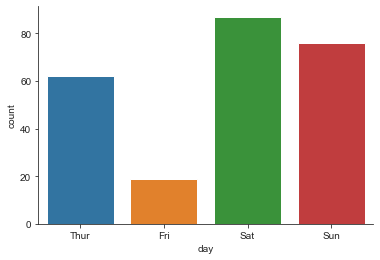

In [67]:
sns.set_style('ticks')   # other options are darkgrid, white, ticks
sns.countplot(x='day',data=tips)
sns.despine()  # remove the spine from plot. By default right and top are true

In [68]:
# SIze and aspectabs

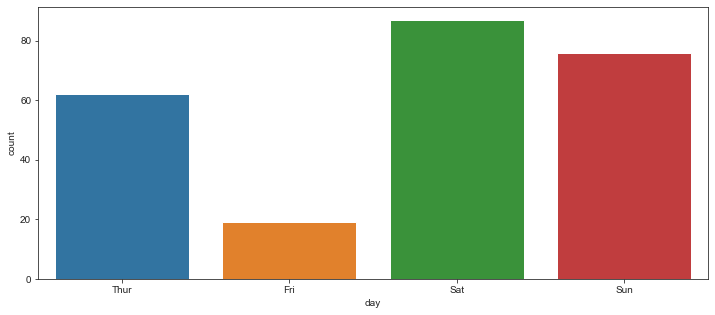

In [70]:
plt.figure(figsize=(12,5))
sns.countplot(x='day',data=tips)

# matplotlib plt func will override the seaborn aspect ratio

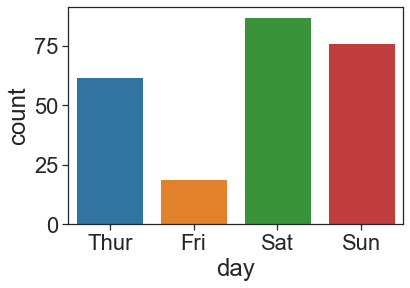

In [79]:
sns.set_context('notebook', font_scale=2)    # other context are paper, notebook, talk, poster
sns.countplot(x='day',data=tips)

# matplotlib plt func will override the seaborn aspect ratio

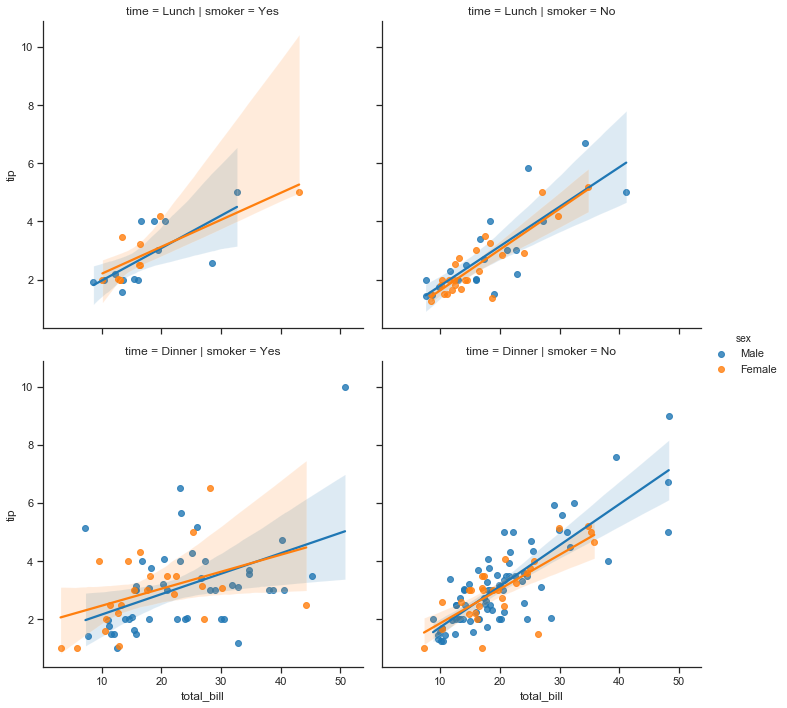

In [85]:
sns.set_context('notebook')
sns.lmplot(x='total_bill',y='tip', data=tips, col='smoker', row='time',hue='sex')

In [86]:
# Colors and Pallettes

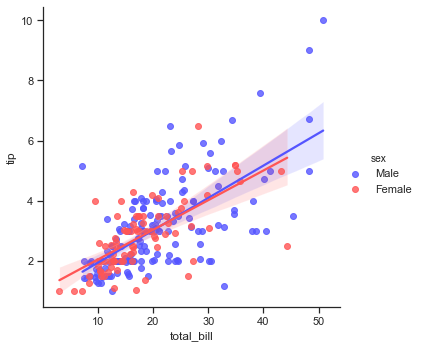

In [87]:
sns.lmplot(x='total_bill',y='tip', data=tips,hue='sex',palette= 'seismic')